In [1]:
# Take  the  24-dimentional  colour  histogram  feature  vectors  of  all  the  training  examples  
# of all the classes.  
# • Group them into 32 clusters using K-means clustering algorithms.  
# • Now  take  an  image,  assign  each  24-dimentional  colour  histogram  feature  vector  to  a  
# cluster.  
# • Count the number of feature vectors assigned to each of the 32 clusters.  
# • This results in a 32-dimentional BoVW representation for that image.  
# • Normalise this vector by dividing it by the number of 24-dimentional histogram feature 
# vectors in that image.  
# • Repeat this for every image in training and test set.

In [2]:
REALIMAGES=[]
# reading vectors from files
import os
for files in os.listdir('./Vectors/forest_needleleaf'):
    with open('./Vectors/forest_needleleaf/'+files, 'r') as f:
        for line in f:
            vectors = line.split(',')
            vectors = [float(i) for i in vectors]
            # print(vectors)
            REALIMAGES.append(vectors)
            
for files in os.listdir('./Vectors/ice_cream_parlor'):
    with open('./Vectors/ice_cream_parlor/'+files, 'r') as f:
        for line in f:
            vectors = line.split(',')
            vectors = [float(i) for i in vectors]
            # print(vectors)
            REALIMAGES.append(vectors)
            
for files in os.listdir('./Vectors/pond'):
    with open('./Vectors/pond/'+files, 'r') as f:
        for line in f:
            vectors = line.split(',')
            vectors = [float(i) for i in vectors]
            # print(vectors)
            REALIMAGES.append(vectors)

In [3]:
print(REALIMAGES[0])

[77.0, 483.0, 363.0, 79.0, 21.0, 1.0, 0.0, 0.0, 13.0, 381.0, 414.0, 173.0, 39.0, 3.0, 1.0, 0.0, 477.0, 410.0, 105.0, 30.0, 1.0, 1.0, 0.0, 0.0]


In [4]:
from sklearn.cluster import KMeans

c:\Users\Vaibhav\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
kmeans=KMeans(n_clusters=32).fit(REALIMAGES)

In [6]:
print(kmeans.cluster_centers_)

[[1.15740348e+00 3.88969028e+00 4.16419177e+00 4.73440815e+00
  6.68179890e+00 5.81047942e+01 9.20299109e+02 2.27420450e+01
  2.24904540e+00 3.64319050e+00 4.38056852e+00 4.94145100e+00
  6.07721680e+00 2.66521001e+01 9.56966059e+02 1.68638099e+01
  2.62452270e+00 4.27874417e+00 1.53343233e+01 2.46512516e+01
  2.54730590e+01 3.89609673e+01 8.27787017e+02 8.26635554e+01]
 [8.58539339e+01 8.89028578e+01 7.85215806e+01 9.69590733e+01
  1.21703046e+02 1.47768552e+02 1.57865459e+02 1.32943314e+02
  4.32119252e+01 6.43534047e+01 8.95385158e+01 1.16038810e+02
  1.47760320e+02 1.74863460e+02 1.59590733e+02 1.15160649e+02
  6.86394214e+01 8.11701752e+01 9.65949665e+01 1.09770669e+02
  1.30360461e+02 1.50113019e+02 1.46896625e+02 1.26972480e+02]
 [3.94954431e+02 3.58950660e+02 1.16712131e+02 5.55812382e+01
  3.49558454e+01 2.18683218e+01 1.12496857e+01 9.09160905e+00
  5.93638749e+02 2.57051069e+02 7.13975487e+01 3.72877121e+01
  2.00243558e+01 1.18969202e+01 7.48538655e+00 4.58218102e+00
  7.67

In [7]:
p=kmeans.predict(REALIMAGES)

In [8]:
print(p.shape)

(132602,)


In [9]:
print(p[0])

6


In [10]:
# convert each image to a 23 dimentional vector
REALIMAGES_BVW=[[],[],[]]
# reading vectors from files
def BoVW(vw):
    image=[0]*32
    for i in kmeans.predict(vw):
        image[i]+=1
    image=[i/len(vw) for i in image]
    return image
import os
for files in os.listdir('./Vectors/forest_needleleaf'):
    with open('./Vectors/forest_needleleaf/'+files, 'r') as f:
        vw=[]
        for line in f:
            vectors = line.split(',')
            vectors = [float(i) for i in vectors]
            vw.append(vectors)
        image=BoVW(vw)
        # print(image)
        REALIMAGES_BVW[0].append(image)
            
for files in os.listdir('./Vectors/ice_cream_parlor'):
    with open('./Vectors/ice_cream_parlor/'+files, 'r') as f:
        vw=[]
        for line in f:
            vectors = line.split(',')
            vectors = [float(i) for i in vectors]
            vw.append(vectors)
        image=BoVW(vw)
        # print(image)
        REALIMAGES_BVW[1].append(image)
            
for files in os.listdir('./Vectors/pond'):
    with open('./Vectors/pond/'+files, 'r') as f:
        vw=[]
        for line in f:
            vectors = line.split(',')
            vectors = [float(i) for i in vectors]
            vw.append(vectors)
        image=BoVW(vw)
        # print(image)
        REALIMAGES_BVW[2].append(image)

In [11]:
# convert each image to a 23 dimentional vector
REALIMAGES_BVW_Test=[[],[],[]]
# reading vectors from files
def BoVW(vw):
    image=[0]*32
    for i in kmeans.predict(vw):
        image[i]+=1
    image=[i/len(vw) for i in image]
    return image
import os
for files in os.listdir('./VectorsTest/forest_needleleaf'):
    with open('./VectorsTest/forest_needleleaf/'+files, 'r') as f:
        vw=[]
        for line in f:
            vectors = line.split(',')
            vectors = [float(i) for i in vectors]
            vw.append(vectors)
        image=BoVW(vw)
        # print(image)
        REALIMAGES_BVW_Test[0].append(image)
            
for files in os.listdir('./VectorsTest/ice_cream_parlor'):
    with open('./VectorsTest/ice_cream_parlor/'+files, 'r') as f:
        vw=[]
        for line in f:
            vectors = line.split(',')
            vectors = [float(i) for i in vectors]
            vw.append(vectors)
        image=BoVW(vw)
        # print(image)
        REALIMAGES_BVW_Test[1].append(image)
            
for files in os.listdir('./VectorsTest/pond'):
    with open('./VectorsTest/pond/'+files, 'r') as f:
        vw=[]
        for line in f:
            vectors = line.split(',')
            vectors = [float(i) for i in vectors]
            vw.append(vectors)
        image=BoVW(vw)
        # print(image)
        REALIMAGES_BVW_Test[2].append(image)

In [12]:
# import random

# import numpy as np
# import matplotlib.pyplot as plt
# from utils import *

# # -*- coding: utf-8 -*-
# """
# Spyder Editor

# This is a temporary script file.
# """
# # importing required modules

# import numpy as np
# #import matplotlib.pyplot as plt
# import random
# import math

# # K- MEANS CLUSTERING

# # initialization of  mean i.e choose random centeroids

# def initilization(data, n_components):
#     """
#     parameter : 
#         data -> class_data in numpy array format
#          n_components   -> Number of cluster
#     -----------------------------
#     return  : initial center for k_mean clustering in list format
    
#     """
#     np.random.seed(0)
   
#     i_mean = []
#     i=1
#     while i < n_components+1:
#         a = random.choice(data)
#         i_mean.append(a.tolist())
#         #i_mean.append(a)
#         i += 1
    
#     #print("---  ----  ---  initial",i_mean)
#     #print("@@@@@@@")
#     return i_mean


# # distance between each point and center

# def point_assignment_to_cluster(data , initial_mean, n_components):
#     """
#     parameters : 
#         data -> class_data in numpy array format
#          n_components   ->  Number of cluster
#         initial_mean -> initialization function output i.e. initial mean
    
#     return : list containing lists and each inner list contained data_points belonging to corresponding cluster
             
    
#     """
    
#     # k empty lists
#     l = [[] for i in range(n_components)]
#     # print(l[1])

#     for i in data:
#         #print("    for ",i," in data     ")
#         lst = []
#         for j in initial_mean:
#             #print("    for  ",j,"in initial_mean     ")
#             # d = np.sqrt((i[0]-j[0])**2 +(i[1]-j[1])**2)
#             d= np.linalg.norm(i-j)
#            # print("distance.......",d)
#             lst.append(d) # [d1,d2,d3....dk]
#         #print("distance list--------",lst)
#         dist_list = np.array(lst)  
#         z = dist_list.argmin()
#         #l[z].append(i.tolist())
#         l[z].append(i)
#     #print("function ending")
#     return l

# def updated_mean(l):
#     """
#     parameter : output of point_assignment_to_cluster function
#     --------------------------
#     return  : updated mean  (list)
    
#     calculate mean of each list contained in main list
#     """
#     #print("update mean started and l is ",l)
#     up_mea =[]
#     for i in range(len(l)):
#         # sum1=0
#         # sum2 =0
#         # for j in range(len(l[i])):
#         #     #if len(l[i])!=0:               # ----------??????????????????????-----------
#         #     sum1 += l[i][j][0]
#         #     sum2 += l[i][j][1]
#         # if len(l[i])!=0:
#         #     sum1 = sum1/len(l[i])
#         #     sum2 = sum2 /len(l[i])
#         # up_mea.append([sum1,sum2])
#         up_mea.append(np.mean(l[i], axis=0))
        
#     return up_mea

# def  k_means(data , n_components):
#     """
#     final k_mean function 
#     parameters: 
#         data -> class_data in numpy array format
#          n_components   -> Number of cluster
#     --------------------------
#     return :
#         centroids i.e mean_vector i.e mean of each cluster (list containing mean vector whose dimension is same as number of
#            features)
#         p -> list containing lists and each inner list contained data_points belonging to a corresponding updated_cluster
#     """

#     # initialization of  mean
#     ini_mean = initilization(data, n_components)
    
#     # number of iterations
#     iters=200
    
#     j = 0
#     while j < iters:
        
#         if j == 0 :
#             latest_mean = ini_mean
#         else:
#             pass
#             #latest_mean = center
#         p = point_assignment_to_cluster(data, latest_mean, n_components)
#         #print("()()()()()()()      points   ()()()()()()()  ", p)
#         #print("()()()()()()()      points   ()()()()()()()"  )

#         #print(p)
#         center = updated_mean(p)
#         # print(">>>>>>>", center)
#         latest_mean = center

#         #ini_mean = center
#         #print(ini_mean)
#         j += 1

#     return center , p

# #------------------------------------------------------
# #------------------------------------------------------

# # E-M ALGORITHM

# # import kmens
# from sklearn.cluster import KMeans

# def EM_initialization(data, n_components):
#     """
#     parameters:
#         data -> class_data in numpy array format
#          n_components   -> Number of cluster
#     --------------------------------
#     return :
#         mu -> mean_vector i.e mean of each cluster (list containing mean vector whose dimension is same as number of
#            features)
           
#         w -> list containing w_k i.e proportion of point in kth cluster to total point
        
#         sigma ->  list of covariance matrix for each cluster
#     """
    
#     a = k_means(data , n_components)
#     print("mu",a[0])
#     mu = a[0]
    
#     w = []
#     for i in a[1]:
#         print("len of i",len(i))
#         N_k = len(i) / len(data)
#         w.append(N_k)
    
#     sigma = []
#     for i in a[1]:
#         temp = np.array(i)
#         #print("--------", len(temp.transpose()))
#         #print("@@@@@@@@", len(temp))
#         #print(temp.shape)
#         covariance = np.cov(temp.transpose())
#         #covariance = np.cov(temp)
#         sigma.append(covariance.tolist())
#         #sigma.append(covariance)
        
#     return mu , sigma , w


# # def multivariate_gaussian_pdf(x, mean, cov_matrix):
# #     """
# #     Calculate the probability density function (PDF) of a multivariate Gaussian distribution.

# #     Parameters:
# #         x ->  Input vector (numpy array).
# #         mean -> Mean vector of the distribution (numpy array).
# #         cov_matrix ->  Covariance matrix of the distribution (numpy array).
# #     --------------------------------------------
# #     Returns:
# #          pdf-> Probability density function value.
# #     """
# #     n = len(mean)
# #     spread = np.subtract(x , mean)
# #     det_cov = np.linalg.det(cov_matrix)
# #     inv_cov = np.linalg.inv(cov_matrix)
    
# #     #exponent = -0.5 * np.dot(np.dot((x - mean).T, inv_cov), (x - mean))
# #     exponent = -0.5 * (np.matmul(np.matmul(np.transpose(spread), inv_cov) , spread))
# #     coef = 1 / ((2 * np.pi) ** (n / 2) * det_cov ** 0.5)
    
# #     pdf = coef * np.exp(exponent)
    
# #     return pdf
# from scipy.stats import multivariate_normal

# multivariate_gaussian_pdf=multivariate_normal.pdf
# multivariate_normal_pdf=multivariate_normal.pdf

# # E_step 

# def e_step(data, means, covariances, weights):
#     """
#     parameters :
#          data -> class_data in numpy array format
#          means , covariances , weights -> given by EM_initialization function
#     --------------------------------------------------------------------
#     return:
#         respomsibilities -> posterior probability of x input belonging to kth cluster----for each input and for each cluster
#                             i.e matrix of dimension  (no of data points, no of cluster)
#     """
    
#     n_components = len(means)
#     n_samples = len(data)
    
#     # Calculate responsibilities
#     responsibilities = np.zeros((n_samples, n_components))
#     for n in range(len(data)):
#         for i in range(n_components):
#         #multivar_dist = multivariate_normal(mean=means[i], cov=covariances[i])
#         #multivar_dist = gaussian_pdf(x , mu[i] , sigma[i])
        
#             responsibilities[n:, i] = weights[i] * multivariate_gaussian_pdf(data[n] , means[i] , covariances[i],allow_singular=True)
        
    
#     # Normalize responsibilities
#     responsibilities /= responsibilities.sum(axis=1, keepdims=True)
    
#     return responsibilities

# # M- Step

# def m_step(data, responsibilities):
#     """
#     parameters :
#         data -> class_data in numpy array format
#         responsibilities -> given by e_step function
#     -------------------------------------------
#     return :
#         means , covariances, weights -> return updated means , covariances , weights
#     """
#     n_components = responsibilities.shape[1]
#     n_samples, n_features = data.shape
    
#     # Update means, covariances, and weights
#     means = np.dot(responsibilities.T, data) / responsibilities.sum(axis=0, keepdims=True).T
#     covariances = [np.dot((responsibilities[:, i] * (data - means[i]).T), (data - means[i])) / responsibilities[:, i].sum() for i in range(n_components)]
#     weights = responsibilities.sum(axis=0) / n_samples
    
#     return means, covariances, weights


# def gmm(data, n_components):
#     """
#     1) initialization of means, covariances, weights
#     2) define totalData_likelihood function
#     3) repeat E-step and M-step until difference between consecutive likelihood is less than threshold
    
#     parameters: 
#         data -> class_data in numpy array format
#         n_components -> number of cluster
#     ------------------------------------------
#     return:
#         final updated means , covariances, weights i.e parameter for computing likelihood
#         iteration_list ,likelihood_list -> for plotting loglikelihood v/s iteration 
        
#     """
#     means, covariances, weights =  EM_initialization(data, n_components)
#     threshold = 10**(-3)
    
#     likelihood_list = []
   
#     def totalData_logLikelihood():
#         likelihood = 0
#         for n in range(len(data)):
#             l = 0
#             for k in range(n_components):
#                 print("mean",means[k])
#                 print("covariance",covariances[k])
#                 l += weights[k] *multivariate_gaussian_pdf(data[n] , means[k] , covariances[k],allow_singular=True)
#             likelihood += np.log10(l)
#         return likelihood
    
#     likelihood_ = totalData_logLikelihood()
    
#     likelihood_list.append(likelihood_)
#     #iteration_list = [0]
#     j=1
#     while True:
#         #if j == 1:
#             #up_means, up_covariances, up_weights = means, covariances, weights
            
#         #E-step
#         responsibilities = e_step(data, means, covariances, weights)
#         #print("--------------",responsibilities)
        
#          # M-step
#         means, covariances, weights = m_step(data, responsibilities)
#         #print("wowwwwwwwwww!!!!!!!!!!", means,"\n", covariances,"\n", weights,"\n")
        
#         #up_means, up_covariances, up_weights = means_, covariances_, weights_
        
#         temp = likelihood_
#         likelihood_ = totalData_logLikelihood()
#         #print(likelihood_)
#         likelihood_list.append(likelihood_)
        
#         #iteration_list.append(j)
#         j+=1
#         if abs(likelihood_ - temp)< threshold:
#             break
        
#     return means, covariances, weights  ,likelihood_list


# # BAYES CLASSIFIER : MULTIMODAL DENSITY

# def likelihood(x , data_class , n_components ):
#     means, covariances, weights, _, __ = gmm(data_class, n_components)
#     l = 0
#     for k in range(n_components):
#         l += weights[k] *multivariate_gaussian_pdf(x , means[k] , covariances[k],allow_singular=True)
        
#     return l 

# def likelihood_from_cov_mean(x,means,covariances,weights,n_components):
#     l = 0
#     for k in range(n_components):
#         l += weights[k] *multivariate_gaussian_pdf(x , means[k] , covariances[k])
        
#     return l 



# GRID_SIZE = 200

# def grid_points(classes_data_to_show=[]):
    
#         x_min = min([min([i[0] for i in cls]) for cls in classes_data_to_show])

#         y_min = min([min([i[1] for i in cls]) for cls in classes_data_to_show])

#         x_max = max([max([i[0] for i in cls]) for cls in classes_data_to_show])

#         y_max = max([max([i[1] for i in cls]) for cls in classes_data_to_show])

#         space_percentage = 10
#         x_range = x_max - x_min
#         y_range = y_max - y_min
#         x_padding = (x_range * space_percentage) / 100.0
#         y_padding = (y_range * space_percentage) / 100.0

#         x_min -= x_padding
#         x_max += x_padding

#         y_min -= y_padding
#         y_max += y_padding
        
#         if len(classes_data_to_show) == 0:
#             x_min = 0
#             y_min = 0
#             x_max = 10
#             y_max = 10
        
#         return np.meshgrid(
#             np.linspace(x_min, x_max,GRID_SIZE), np.linspace(y_min, y_max, GRID_SIZE)
#         )

# class confusion_matrix:
#     def __init__(self, matrix=[]):
#         self.matrix = matrix

#     def print(self):
#         print("confusion matrix: ")
#         print(self.matrix)

#         print("accuracy: ", self.accuracy())

#         print("precision: ", self.precision())

#         print("recall: ", self.recall())

#         print("f1_score: ", self.f1_score())

#     def fill(self, actual, predicted):
#         self.matrix[actual][predicted] += 1

#     # assuming the matrix is n*n

#     def accuracy(self):
#         total = 0

#         correct = 0

#         for i in range(len(self.matrix)):
#             for j in range(len(self.matrix)):
#                 total += self.matrix[i][j]

#                 if i == j:
#                     correct += self.matrix[i][j]

#         return correct / total

#     def precision(self):
#         precision = []

#         for i in range(len(self.matrix)):
#             tp = self.matrix[i][i]

#             fp = 0

#             for j in range(len(self.matrix)):
#                 if i != j:
#                     fp += self.matrix[j][i]

#             precision.append(tp / (tp + fp))

#         return precision

#     def recall(self):
#         recall = []

#         for i in range(len(self.matrix)):
#             tp = self.matrix[i][i]

#             fn = 0

#             for j in range(len(self.matrix)):
#                 if i != j:
#                     fn += self.matrix[i][j]

#             recall.append(tp / (tp + fn))

#         return recall

#     def f1_score(self):
#         precision = self.precision()
#         recall = self.recall()

#         f1_score = []

#         for i in range(len(self.matrix)):
#             f1_score.append(2 * precision[i] * recall[i] / (precision[i] + recall[i]))

#         return f1_score
    
# class Cluster_representation:
#     def __init__(self,mean=[],covariance=[],weight=0):
#         self.mean=mean
#         self.covariance=covariance
#         self.weight=weight


# class class_representation:
#     def __init__(self,k=1):
#         self.clusters=[]
#         self.prior=1
#         self.num_of_clusters=k
        
#     def point_probability_for_cluster(self,point,cluster):
#         # print(self.num_of_clusters)
#         # print(self.clusters)
#         total_probability=0
#         for i in range(self.num_of_clusters):
#             # also handle singular matrix error
#             if(np.linalg.det(self.clusters[i].covariance)==0):
#                 return 0
#             total_probability+=self.clusters[i].weight*multivariate_normal_pdf(point,self.clusters[i].mean,self.clusters[i].covariance,allow_singular=True)
#         # print("Total Probability :",total_probability,)
#         if(total_probability==0):
#             return 0
#         return (self.clusters[cluster].weight*multivariate_normal_pdf(point,self.clusters[cluster].mean,self.clusters[cluster].covariance,allow_singular=True))/total_probability
    
#     def total_data_likelihood(self, data):
#         likelihood=0
#         for point in data:
#             l=0
#             for i in range(self.num_of_clusters):
#                     # also handle singular matrix error
#                     if(not np.linalg.det(self.clusters[i].covariance)==0):
#                         l+=self.clusters[i].weight*multivariate_normal_pdf(point,self.clusters[i].mean,self.clusters[i].covariance,allow_singular=True)
#             likelihood+=np.log10(l)
#         return likelihood
                
#     def fit(self,data,max_itr):
#         # initilizing cluster centers with help of k-means
        
#         data=np.array(data)
        
#         print('data',data.shape)
#         means, covariances, weights  ,likelihood_list = gmm(data, self.num_of_clusters)
#         print("gmm done")
                        
#         self.clusters = [Cluster_representation() for i in range(self.num_of_clusters)]
#         for i in range(self.num_of_clusters):
#             self.clusters[i].mean=means[i]
#             self.clusters[i].covariance=covariances[i]
#             self.clusters[i].weight=weights[i]
        
#         return likelihood_list
        
 

# class Bayes_Classifier_GMM:
#     def __init__(self,k):
#         self.classes=[]
#         self.num_of_classes=0
#         self.k=k
    
        
#     def train(self,classes_train_data,max_itr=200):
#         self.num_of_classes=len(classes_train_data)
#         likelihood=[]
#         for i in range(self.num_of_classes):
#             self.classes.append(class_representation(self.k))
#             likelihood.append(self.classes[i].fit(classes_train_data[i],max_itr))
#         return likelihood
        
#     def predictVectors(self,vectors):
#         max_probability=0
#         which_class=0
#         for i in range(self.num_of_classes):
#             AllVectorsProbability=1
#             for vector in vectors:                
#                 probability=0
#                 for j in range(self.classes[i].num_of_clusters):
#                     if(np.linalg.det(self.classes[i].clusters[j].covariance)==0):
#                         continue
#                     probability+=self.classes[i].clusters[j].weight*multivariate_normal_pdf(vector,self.classes[i].clusters[j].mean,self.classes[i].clusters[j].covariance,allow_singular=True)
#                 AllVectorsProbability*=probability
#             if AllVectorsProbability>max_probability:
#                 max_probability=AllVectorsProbability
#                 which_class=i
#         return which_class
            
#     def predict(self,vector,ConsiderClasses=-1):
#         max_probability=0
#         which_class=0
#         for i in range(self.num_of_classes):
#             if ConsiderClasses != -1 and i not in ConsiderClasses:
#                 continue
#             probability=0
#             for j in range(self.classes[i].num_of_clusters):
#                 if(np.linalg.det(self.classes[i].clusters[j].covariance)==0):
#                     continue
#                 probability+=self.classes[i].clusters[j].weight*multivariate_normal_pdf(vector,self.classes[i].clusters[j].mean,self.classes[i].clusters[j].covariance,allow_singular=True)
#             if probability>max_probability:
#                 max_probability=probability
#                 which_class=i
#         return which_class
    
#     def test(self,classes_test_data):
#         confusion=confusion_matrix(np.zeros((self.num_of_classes,self.num_of_classes)))
        
#         for i in range(len(classes_test_data)):
#             for point in classes_test_data[i]:
#                 predicted = self.predict(point)
#                 confusion.fill(i, predicted)
        
#         return confusion
    
    
    
#     def plot_decision_regions_2d(self,title,classes_data_to_show=[],saveOnly=False):
#         xx,yy = grid_points(classes_data_to_show)
        
#         Grid_Points = np.c_[xx.ravel(), yy.ravel()]

#         # Predict class labels for the grid points using classifier

#         predictions = np.array([self.predict(point) for point in Grid_Points])

#         predictions = predictions.reshape(xx.shape)

#         # Create a contour plot for decision regions

#         plt.contourf(xx, yy, predictions, cmap=plt.cm.RdYlBu, alpha=0.7)

#         # Scatter plot for the training data points

#         n=0
#         for cls in classes_data_to_show:
#             plt.scatter(
#                 [i[0] for i in cls],
#                 [i[1] for i in cls],
#                 label="Class " + str(classes_data_to_show.index(cls) + 1),
#             )
#             n+=1

#         plt.xlabel("Feature 1")

#         plt.ylabel("Feature 2")

#         plt.title("Decision Regions for " + title)

#         plt.legend()

#         if(saveOnly==False):
#             plt.show()
        
#         # plt.savefig(f"Images\Decision Regions for {title}")
        
#         plt.close()

#     def plot_contour(self,title,classes_data_to_show=[],saveOnly=False):
        
#         # plot each class data points
#         for cls in classes_data_to_show:
#             plt.scatter(
#                 [i[0] for i in cls],
#                 [i[1] for i in cls],
#                 label="Class " + str(classes_data_to_show.index(cls) + 1),
#             )
            
#         # plot mean of each cluster
#         c_no=0
#         for cls in self.classes:
#             c_no+=1
#             cl_no=0
#             for cluster in cls.clusters:
#                 cl_no+=1
#                 plt.scatter(cluster.mean[0],cluster.mean[1],label="mean for class "+ str(c_no)+" cluster "+str(cl_no),marker="x",color="black")
                
#         # plot countour for each cluster
#         xx, yy = grid_points(classes_data_to_show)
        
#         for cls in self.classes:
#             for cluster in cls.clusters:
#                 pdf=np.zeros((GRID_SIZE,GRID_SIZE))
#                 for i in range(GRID_SIZE):
#                     for j in range(GRID_SIZE):
#                         pdf[i][j]=multivariate_normal_pdf([xx[i][j],yy[i][j]],cluster.mean,cluster.covariance,allow_singular=True)
#                 plt.contour(xx,yy,pdf,levels=2,colors='k',alpha=0.7)
        
#         # plt.gca().set_aspect('equal', adjustable='box')
        
#         plt.xlabel("Feature 1")

#         plt.ylabel("Feature 2")

#         plt.title("Coutour plot for " + title)

#         # legend = plt.legend(loc='upper left')
        
#         # plt.legend()

#         if(saveOnly==False):
#             plt.show()
        
#         # plt.savefig(f"Images\Countour plot for {title}")
        
#         plt.close()
            
#     def plot_decision_regions_for_each_pair_of_classes(self, title, classes_data_to_show=[],saveOnly=False):
#         # plot between each pair of classes
#         for i in range(len(classes_data_to_show)):
#             for j in range(i+1,len(classes_data_to_show)):
#                 xx,yy = grid_points(classes_data_to_show)
#                 Grid_Points = np.c_[xx.ravel(), yy.ravel()]
#                 # this line in not correct
#                 predictions = np.array([self.predict(point,[i,j]) for point in Grid_Points])
#                 predictions = predictions.reshape(xx.shape)
                
#                 plt.contourf(xx, yy, predictions, alpha=0.7, cmap=plt.cm.RdYlBu)
                
#                 # plotting the two classes
#                 plt.scatter(
#                     [i[0] for i in classes_data_to_show[i]],
#                     [i[1] for i in classes_data_to_show[i]],
#                     label="Class " + str(i + 1),
#                 )
#                 plt.scatter(
#                     [i[0] for i in classes_data_to_show[j]],
#                     [i[1] for i in classes_data_to_show[j]],
#                     label="Class " + str(j + 1),
#                 )

#                 plt.xlabel("Feature 1")

#                 plt.ylabel("Feature 2")

#                 plt.title("Decision Regions for " + title+ f" beween classs{i+1} and class{j+1}")

#                 plt.legend()

#                 if(saveOnly==False):
#                     plt.show()
                
#                 # plt.savefig(f"Images\Decision Regions for {title} beween_classs{i+1} and class{j+1}")
                
#                 plt.close()

In [13]:
from GMM import *

In [68]:
K=16
model = Bayes_Classifier_GMM(K)

In [69]:
likelihood=model.train(REALIMAGES_BVW,max_itr=20)

data (50, 32)


ValueError: array must not contain infs or NaNs

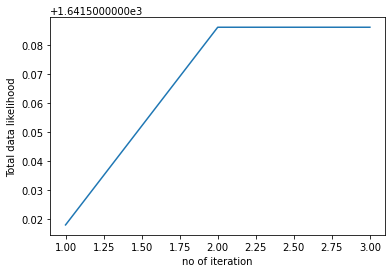

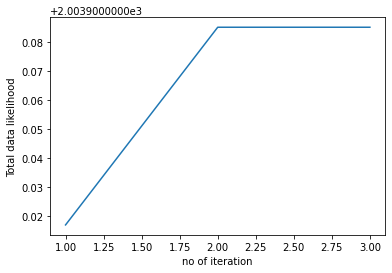

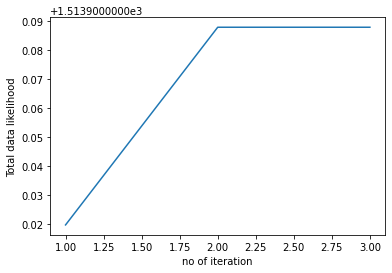

In [ ]:
for l in likelihood:
    plt.plot([i for i in range(1,len(l)+1)],[L for L in l])
    plt.xlabel("no of iteration")
    plt.ylabel("Total data likelihood")
    plt.show()

In [ ]:
confusion = model.test(REALIMAGES_BVW_Test)

In [ ]:
confusion.print()

confusion matrix: 
[[31.  6. 13.]
 [ 3. 36. 11.]
 [ 4.  3. 43.]]
accuracy:  0.7333333333333333
precision:  [0.8157894736842105, 0.8, 0.6417910447761194]
recall:  [0.62, 0.72, 0.86]
f1_score:  [0.7045454545454546, 0.7578947368421052, 0.735042735042735]
